# Natural Language “Pre” processing: useful functions for the first steps

Natural Language Processing (or NLP) is one of the top trending topics on Machine and Deep Learning nowadays, with applications such as sentiment analysis, chatbots and audio recognition. Dispatch the complexity of these more advanced projects and models, Data Scientists spend more time raggling with messy data, data cleaning and collecting. In that spirit the aim of this post is to share some useful lines of code that can be applied to the first steps of a NLP project. 

We are going to develop a function that takes as input a non processed text column of a pandas data frame and produces as output a clean list of texts ready for useful descriptive analysis. We are also going to show how this is converted into numeric format for Machine Learning models. 


### 1. Importing and inspecting the data

We are going to work in Python, importing the next libraries (if you don’t have them downloaded, you can install them in Terminal with pip install as usual):

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
print(np.__version__)

It also could be needed to specify the next commands to download ‘stopwords’ and ‘wordnet’.

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ignacio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ignacio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

For input we can import a csv file, this needs to have a string variable, the one that we are going to process.

For this example and for tutorial purposes we have an extremely simple database with 3 variables: ‘Id’, ‘text’ and ‘result’, and only 4 rows. But the same function can be extended to any length. Thinking in a simple machine model like a logistic regression, ‘result’ would be the target variable (1 - positive, 0 - negative) and ‘text’ the regressor in natural language format which we are interested in. This is the typical example of a movie´s review database.


In [2]:
train =pd.read_csv("train_data.csv")
print(train)

   Id                                        text  result
0   1                 I think it was a good movie       1
1   2    The movie was really bad total deception       0
2   3      I think that the movie was really good       1
3   4   The movie was horrible! Really really bad       0


### 2. Appling the preprocessing function for NLP

So now we are ready to jump right to the function. It has 7 steps commented in hashtag. If you don't feel comfortable you can pass each line of code by one and print every step to see the transformation of the raw text.

In [4]:
def text_to_words( raw_text ):
    # 1. Remove punctuation, tags, markups, numbers and stop words
    beautiful_text = BeautifulSoup(raw_text).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", beautiful_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #  Lemmatize
    lemma =[]
    lemmatizer = WordNetLemmatizer()
    for word in meaningful_words:
        lemma_word = lemmatizer.lemmatize(word, pos = "v")
        lemma.append(lemma_word)
    
    # 6. Join the words back into one string separated by space, and return the result.
    return( " ".join( lemma ))
    


Let's see what this function does: it first takes a raw text in a list format and removes all kinds of punctuation, then removes all non letters characters and lowercases every word, then it removes english stop words, tokenizes, lemmatize and gives you back a variable with clean text.

We are not going to go deep on what these steps are, because each of them could be a single post. But in a quick explain: it first removes punctuation, non letters, and lowercases; the stopwords algorithm is developed to identify and remove common language words as “I”, “we”, “not”, etc, that are frequent in any english text; tokenization is a analytical pre step that separates hole strings into single units or tokens, in this case each word is a token; finally lemmatization is a process of reducing words to its minimal expression (for example “running”, “runs”, “runner”, are all transformed to “run”). 

All these steps aim for removing redundancy not useful for analysis, since a shorter and meaningful text is more useful in descriptive analysis and tends to perform better on machine learning algorithms.

Now we can see the utility of our function by passing any row of the text column:

In [5]:
clean_text = text_to_words( train["text"][0] )
print(clean_text)

think good movie


And with the next loop we can also clean in one step all the rows of our column variable.

In [8]:
num_data_rows = train["text"].size

clean_train_rows = []

for i in range(0, num_data_rows):
                  if ( (i+1)%1000 == 0 ):
                          print( "Review %d of %d\n" % (i +1, num_data_rows)  ) #print status of the loop
                  clean_train_rows.append( text_to_words( train["text"][i] ) ) 
                

We can print now any row and see how it has been cleaned and ready for analysis

In [11]:
print(clean_train_rows[0])
print(clean_train_rows[1])
print(clean_train_rows[2])
print(clean_train_rows[3])

think good movie
movie really bad total deception
think movie really good
movie horrible really really bad


At this moment we are able to make a wide variety of descriptive analysis of the processed text. This post covers one option, a cloud of words.

### 3. A descriptive analysis: WordCloud

With the next commands we are going to first append our clean text string to the original dataframe, then split the data into positive and negative results, and finally generate two arrays for each result.

In [13]:
# Make a word cloud for a natural language row of the 'clean_train_rows' list

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Append the clean text to de data frame and separate in good and bad results
train["text_clean"] = clean_train_rows

positive_result = train[train["result"] == 1]
negative_result = train[train["result"] == 0]

all_positive_clean = " ".join( positive_result["text_clean"] )
all_negative_clean = " ".join( negative_result["text_clean"] )

Notice that ‘all_positive_clean’ and ‘all_negative_clean’ are both strings with all the positive and negative texts combined. We can now generate two word clouds, one with all the positive comments and the other with all the negative ones of the whole database.

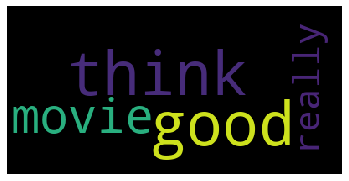

<Figure size 432x288 with 0 Axes>

In [14]:
# Print word cloud for good results
wordcloud1 = WordCloud()
wordcloud1.generate(all_positive_clean)
wordcloud1.to_image()

plt.imshow(wordcloud1)
plt.axis("off")
plt.show()
wordcloud1.to_file("wordcloud1.png")
plt.clf()

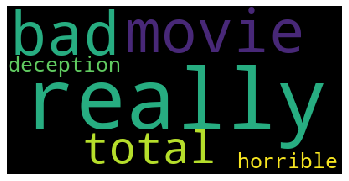

<Figure size 432x288 with 0 Axes>

In [15]:
# Print word cloud for bad results
wordcloud0 = WordCloud()
wordcloud0.generate(all_negative_clean)
wordcloud0.to_image()

plt.imshow(wordcloud0)
plt.axis("off")
plt.show()
wordcloud0.to_file("wordcloud2.png")
plt.clf()

This data set is only 4 rows with few text just for pedagogical purposes, but if the same functions are used in real databases you could see at this point the utility of all our code. A visual insight in this case is that the negative reviews tend to use more emphatic words, maybe as a way of manifesting a state of indignation. As a data analyst you can use this kind of insight to discover common patterns in positive and negative reviews.

### 4. Convert it into numeric! CountVectorizer

To end this post, we are going to dedicate a few lines to the CountVectorizer function from sklearn library. Scikit-learn as a widely useful machine learning library has its own already developed functions that can do a lot of the cleaning job automatically, this is the case of CountVectorizer. Although the goal of this post is to understand each step and to appreciate the flexibility of making our own functions, we are going to use CountVectorizer to compare the results.

Lets apply the default CountVectorizer function on the clean text we created and inspect the output.


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# list converted to numeric features
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(clean_train_rows)
matrix.shape
print(matrix)

  (0, 6)	1
  (0, 2)	1
  (0, 4)	1
  (1, 4)	1
  (1, 5)	1
  (1, 0)	1
  (1, 7)	1
  (1, 1)	1
  (2, 6)	1
  (2, 2)	1
  (2, 4)	1
  (2, 5)	1
  (3, 4)	1
  (3, 5)	2
  (3, 0)	1
  (3, 3)	1


Now we face a totally different format of the data, what happened? Machine Learning models can only deal with numerical data, so the words needed to be transformed in some way. But it is not intuitive for humans to understand some of these formats, moreover in large datasets.

What Scikit-learn is doing under the hood is taking all the words in the list and converting them into a matrix in which each line of the output shows us: “ (‘row’, ‘assigned number of the word’) ‘repetition of the word in the row’ ”.

If it is still too abstract to understand,  let's take advantage of our super tiny dataset to see what Scikit-learn is doing to the data. The next lines of code convert the CountVectorizer matrix to a data frame with each word as a column name and each row as the original rows indexes (you can´t do this if your data extends more than a few words, that is real life scenarios).

In [17]:
matrix_df = pd.DataFrame(matrix.toarray())
matrix_df.columns = vectorizer.get_feature_names()
matrix_df.shape
print(matrix_df)

   bad  deception  good  horrible  movie  really  think  total
0    0          0     1         0      1       0      1      0
1    1          1     0         0      1       1      0      1
2    0          0     1         0      1       1      1      0
3    1          0     0         1      1       2      0      0


Now we can see and understand how the process of converting words into numbers is achieved by the algorithms, and here we would end our post. We had seen how to celan, handle, inspect descriptive insights and dive in the first steps of a machine learning process.

We decided not to go further by now, but there are a lot more preprocessing steps that achieve more accurate results in predictions. For example the Tfidf vectorization is useful for removing words that appear in the whole corpus (all the rows of the data). 

The post aimed to scratch the surface of some basic gadgets of a NLP Machine Learning toolbox and develop useful functions for any dataframe. If you are interested in more you could check out Scikit-learn documentation and also try your own functions.


Documentation:

https://www.kaggle.com/c/word2vec-nlp-tutorial

https://learn.datacamp.com/projects/word-frequency-classic-novels

https://learn.datacamp.com/projects/158

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python